# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
import sys
print(sys.executable)

/Users/ilhampraja/opt/anaconda3/envs/main-ds/bin/python


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer 

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv("Dataset_clustering.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Karakteristik dari dataset tersebut :**

* Pada kolom **Income** terdapat data yang hilang
* Type data yang salah pada kolom **Dt_Customer**

Data yang hilang akan dihapus dan tipe data yang salah akan diperbaiki pada proses data preprocessing

In [5]:
print("Jumlah duplikasi: ",df.duplicated().sum())
df.describe()

Jumlah duplikasi:  0


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Data tidak memiliki duplikasi

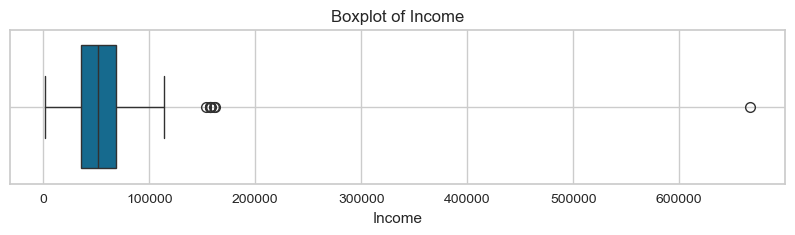

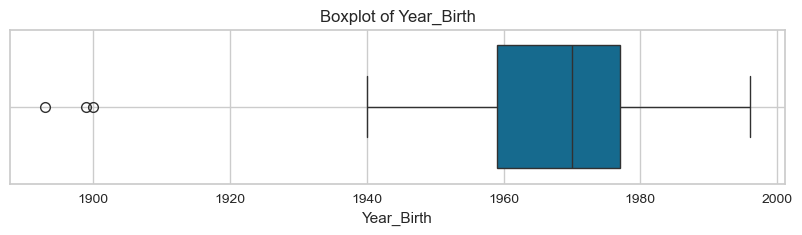

In [6]:
columns = ['Income', 'Year_Birth']

for col in columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

Terdapat outlier pada kolom **Income** dan **Year_Birth** 

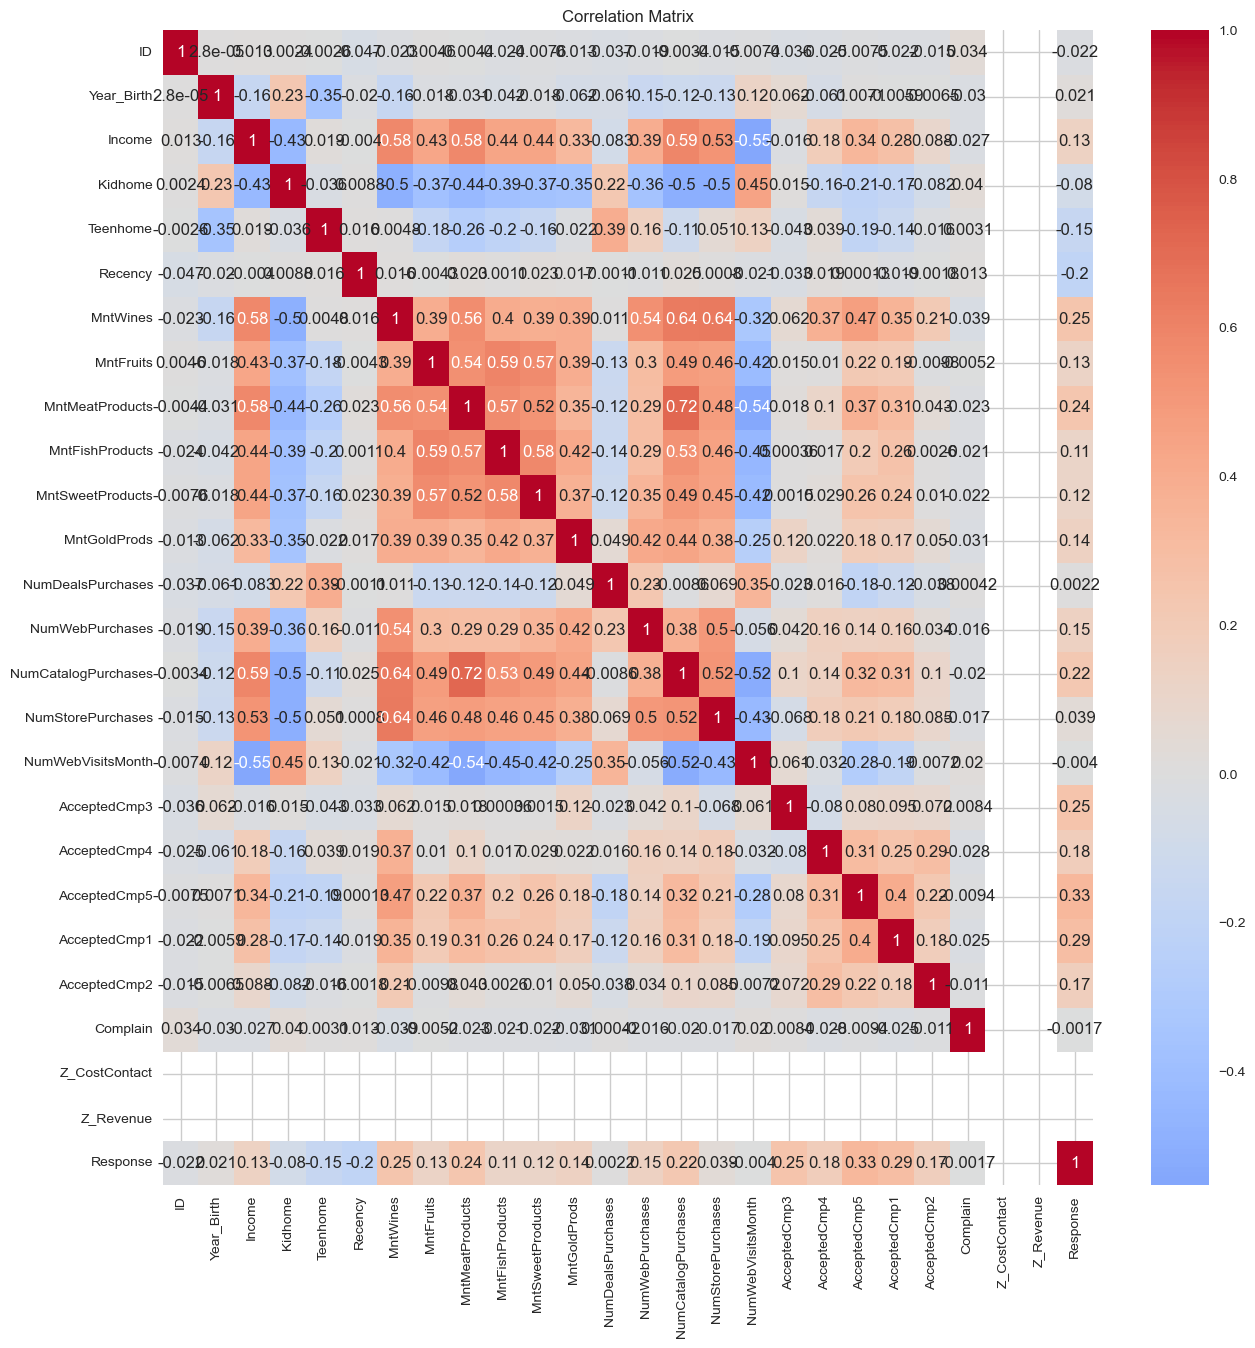

In [7]:
#correlation matrix
corrmat = df.select_dtypes(include=['number']).corr()
# Visualisasi heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Menghapus data kosong

In [8]:
#Hapus data kosong
df = df.dropna()
print("Total data setelah data kosong dihapus:", len(df))

Total data setelah data kosong dihapus: 2216


Memperbaiki tipe data

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

Menghapus outlier

In [10]:
# Deteksi dan hapus outlier dengan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Hapus outlier dari kolom 'Year_Birth' dan 'Income'
df = remove_outliers_iqr(df, "Year_Birth")
df = remove_outliers_iqr(df, "Income")

# Tampilkan jumlah data setelah outlier dihapus
print("Total data setelah outlier dihapus:", len(df))


Total data setelah outlier dihapus: 2205


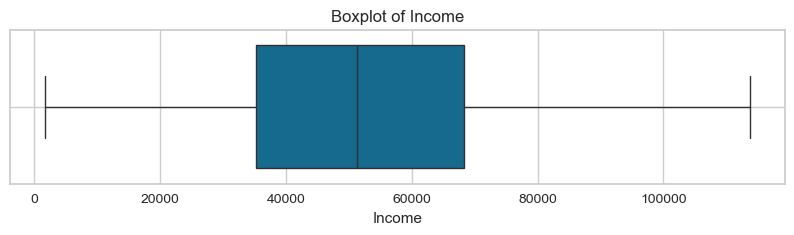

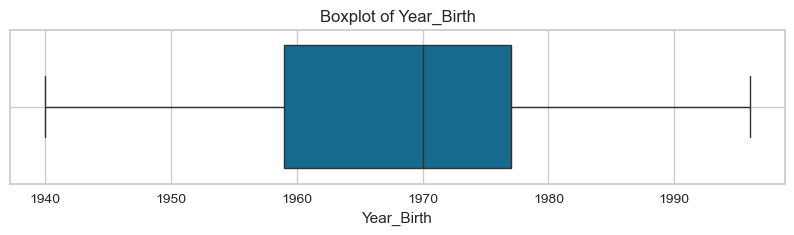

In [11]:
columns = ['Income', 'Year_Birth']

for col in columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

Membuat Fitur baru

In [12]:
df["Marital_Status"].value_counts()

Marital_Status
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
df["Education"].value_counts()

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

Kolom **Marital_Status** dan **Education** bisa disederhanakan.

In [14]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [15]:
df["Living_With"].value_counts()

Living_With
Partner    1422
Alone       783
Name: count, dtype: int64

In [16]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [17]:
df["Education"].value_counts()

Education
Graduate         1113
Postgraduate      840
Undergraduate     252
Name: count, dtype: int64

Membuat Fitur Umur dengan cara mengurangi tahun 2025 dengan tahun lahir 

In [18]:
df['Age'] = 2025 - df['Year_Birth']
df.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Living_With,Age
count,2205.000000,2205.000000,2205,2205,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205,2205.000000
unique,NaN,NaN,3,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Graduate,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partner,NaN
freq,NaN,NaN,1113,854,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1422,NaN
mean,5585.439456,1968.904308,NaN,NaN,51622.094785,0.442177,0.506576,2013-07-10 06:45:33.061224704,49.009070,306.164626,...,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,NaN,56.095692
min,0.000000,1940.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,NaN,29.000000
25%,2815.000000,1959.000000,NaN,NaN,35196.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,NaN,48.000000
50%,5455.000000,1970.000000,NaN,NaN,51287.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,178.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,NaN,55.000000
75%,8418.000000,1977.000000,NaN,NaN,68281.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,507.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,NaN,66.000000
max,11191.000000,1996.000000,NaN,NaN,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,NaN,85.000000


Membuat fitur Kids dari jumlah Kidhome ditambah Teenhome

In [19]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

Membuat Fitur spent dari penjumlahan barang yang sudah pernah dibeli pelanggan

In [20]:
df["Spent"] =  df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

Membuat fitur Total pembelian yang dipengaruhi dari beberapa hal

In [21]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

Membuat Fitur Total penerimaan konsumen terhadap penawaran dari Campaign

In [22]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Menghapus beberapa kolom untuk mengurangi dimensi dan kompleksitas dari model

In [23]:
col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","Dt_Customer", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response","Z_CostContact","Z_Revenue","Marital_Status"]
df=df.drop(columns=col_del,axis=1)

In [24]:
df.sample(5)

,Education,Income,Living_With,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp
1408,Graduate,57045.0,Partner,75,1,454,18,0
797,Undergraduate,60161.0,Alone,60,1,1071,26,0
2091,Undergraduate,22390.0,Partner,56,0,26,4,0
942,Graduate,82025.0,Alone,42,0,1187,12,1
929,Postgraduate,68397.0,Partner,49,1,1416,21,0


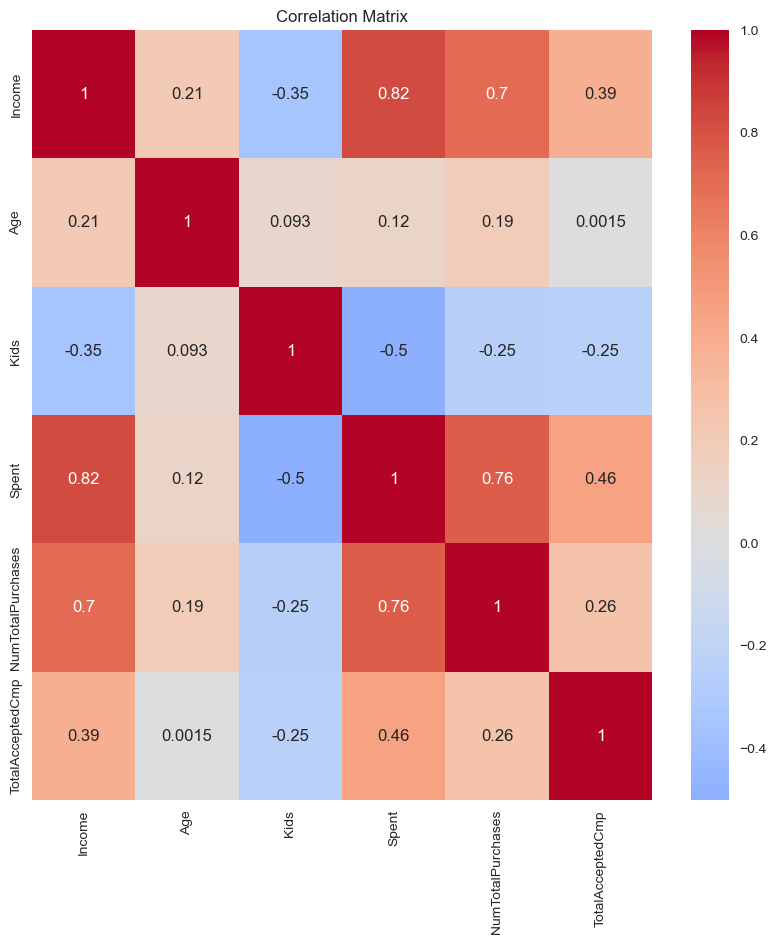

In [25]:
#correlation matrix
corrmat = df.select_dtypes(include=['number']).corr()
# Visualisasi heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [26]:
df.head(5)

,Education,Income,Living_With,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp
0,Graduate,58138.0,Alone,68,0,1617,25,0
1,Graduate,46344.0,Alone,71,2,27,6,0
2,Graduate,71613.0,Partner,60,0,776,21,0
3,Graduate,26646.0,Partner,41,1,53,8,0
4,Postgraduate,58293.0,Partner,44,1,422,19,0


One Hot Encoding

In [27]:
# Langsung dengan pandas
df_encoded = pd.get_dummies(
    df, 
    columns=["Living_With", "Education"], 
    prefix=["Living_With", "Education"]  
)

print(df_encoded)

       Income  Age  Kids  Spent  NumTotalPurchases  TotalAcceptedCmp  \
0     58138.0   68     0   1617                 25                 0   
1     46344.0   71     2     27                  6                 0   
2     71613.0   60     0    776                 21                 0   
3     26646.0   41     1     53                  8                 0   
4     58293.0   44     1    422                 19                 0   
...       ...  ...   ...    ...                ...               ...   
2235  61223.0   58     1   1341                 18                 0   
2236  64014.0   79     3    444                 22                 1   
2237  56981.0   44     0   1241                 19                 1   
2238  69245.0   69     1    843                 23                 0   
2239  52869.0   71     2    172                 11                 0   

      Living_With_Alone  Living_With_Partner  Education_Graduate  \
0                  True                False                True   

In [28]:
df = df_encoded.copy()

In [29]:
df.describe(include="all")

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205,2205,2205,2205,2205
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,1422,1422,1113,1365,1953
mean,51622.094785,56.095692,0.948753,606.821769,14.887982,0.29932,NaN,NaN,NaN,NaN,NaN
std,20713.063826,11.705801,0.749231,601.675284,7.615277,0.68044,NaN,NaN,NaN,NaN,NaN
min,1730.000000,29.000000,0.000000,5.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN
25%,35196.000000,48.000000,0.000000,69.000000,8.000000,0.00000,NaN,NaN,NaN,NaN,NaN
50%,51287.000000,55.000000,1.000000,397.000000,15.000000,0.00000,NaN,NaN,NaN,NaN,NaN
75%,68281.000000,66.000000,1.000000,1047.000000,21.000000,0.00000,NaN,NaN,NaN,NaN,NaN


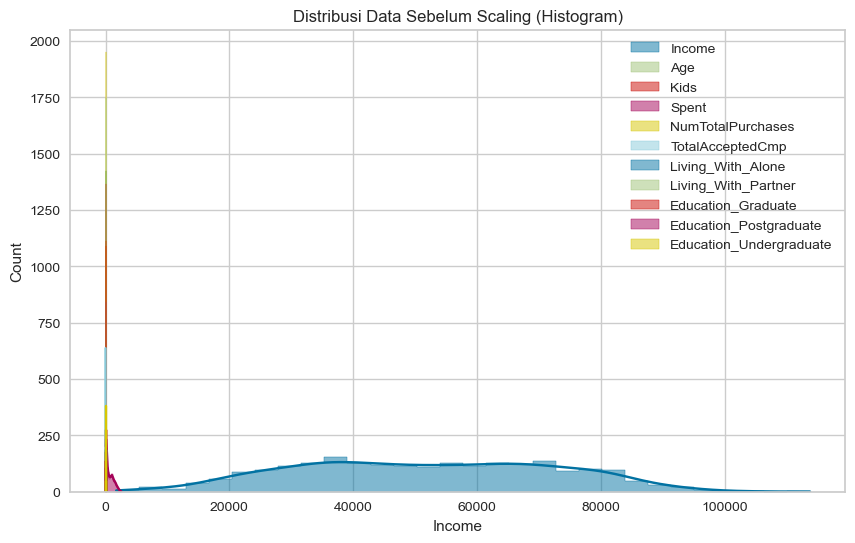

In [30]:
plt.figure(figsize=(10, 6))
for col in df.columns:
    sns.histplot(df[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

In [31]:


# Inisialisasi scaler
scaler = MinMaxScaler()

# Hanya kolom numerik yang akan dinormalisasi
df_normalized = df.copy()
df_normalized[df.columns] = scaler.fit_transform(df[df.columns])

# Menampilkan hasil normalisasi
df_normalized.head()


,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,0.503625,0.696429,0.000000,0.639683,0.581395,0.0,1.0,0.0,1.0,0.0,0.0
1,0.398325,0.750000,0.666667,0.008730,0.139535,0.0,1.0,0.0,1.0,0.0,0.0
2,0.623933,0.553571,0.000000,0.305952,0.488372,0.0,0.0,1.0,1.0,0.0,0.0
3,0.222456,0.214286,0.333333,0.019048,0.186047,0.0,0.0,1.0,1.0,0.0,0.0
4,0.505009,0.267857,0.333333,0.165476,0.441860,0.0,0.0,1.0,0.0,1.0,0.0


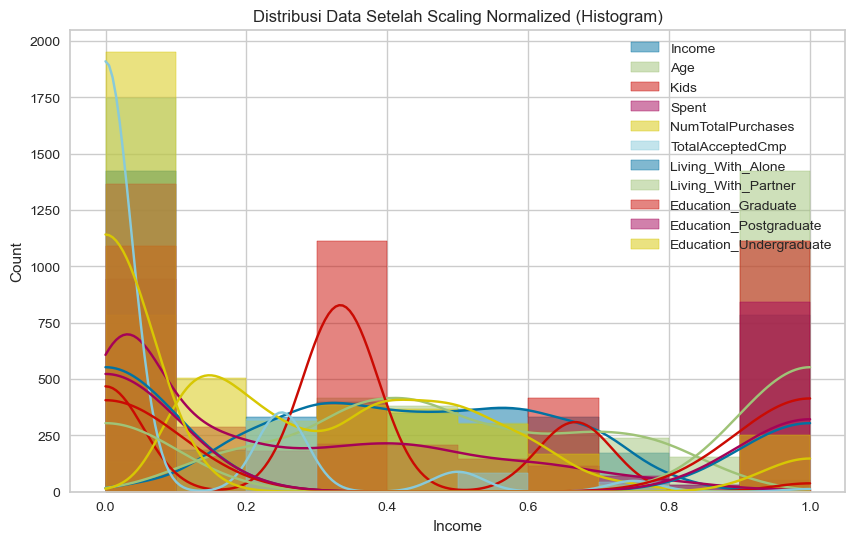

In [32]:
plt.figure(figsize=(10, 6))
for col in df_normalized.columns:
    sns.histplot(df_normalized[col], kde=True, label=col, bins=10, element='step')
plt.title('Distribusi Data Setelah Scaling Normalized (Histogram)')
plt.legend()
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [33]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_normalized)

score = silhouette_score(df_normalized, kmeans_labels)

print(f"Silhouette Score:  {score:.3f}")

Silhouette Score:  0.369


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

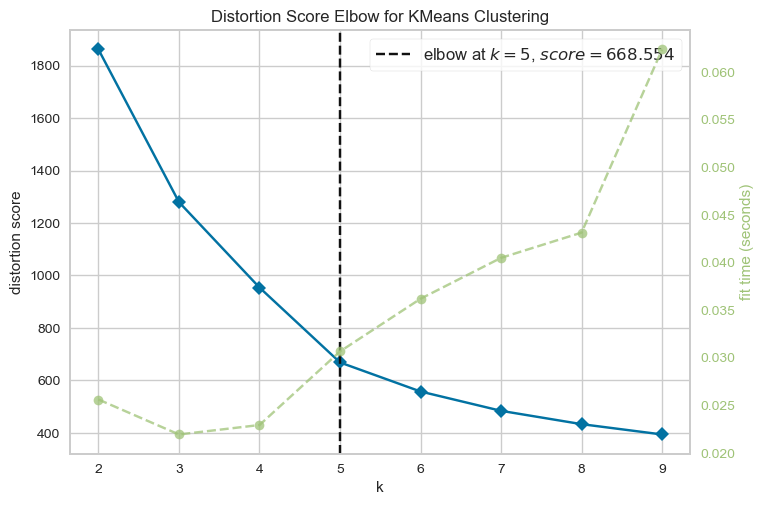

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_normalized)
visualizer.show()

In [35]:
df_normalized.head()

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,0.503625,0.696429,0.000000,0.639683,0.581395,0.0,1.0,0.0,1.0,0.0,0.0
1,0.398325,0.750000,0.666667,0.008730,0.139535,0.0,1.0,0.0,1.0,0.0,0.0
2,0.623933,0.553571,0.000000,0.305952,0.488372,0.0,0.0,1.0,1.0,0.0,0.0
3,0.222456,0.214286,0.333333,0.019048,0.186047,0.0,0.0,1.0,1.0,0.0,0.0
4,0.505009,0.267857,0.333333,0.165476,0.441860,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_normalized)

score = silhouette_score(df_normalized, kmeans_labels)

print(f"Silhouette Score:  {score:.3f}")

Silhouette Score:  0.556


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [37]:
# 1. Buat pseudo-label dari KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
pseudo_labels = kmeans.fit_predict(df_normalized)

# 2. Inisialisasi model dasar
model = LogisticRegression(max_iter=1000)

# 3. Recursive Feature Elimination (pilih banyak fitur)
rfe = RFE(estimator=model, n_features_to_select=7)
rfe.fit_transform(df_normalized, pseudo_labels)

# 4. Ambil dan tampilkan nama fitur yang dipilih
selected_features = df_normalized.columns[rfe.support_]
print("Fitur terpilih berdasarkan RFE ):", selected_features.tolist())

# 5. Ambil fitur pilihan untuk dipakai pada model
X_rfe = rfe.fit_transform(df_normalized, pseudo_labels)

Fitur terpilih berdasarkan RFE ): ['Income', 'Age', 'Living_With_Alone', 'Living_With_Partner', 'Education_Graduate', 'Education_Postgraduate', 'Education_Undergraduate']


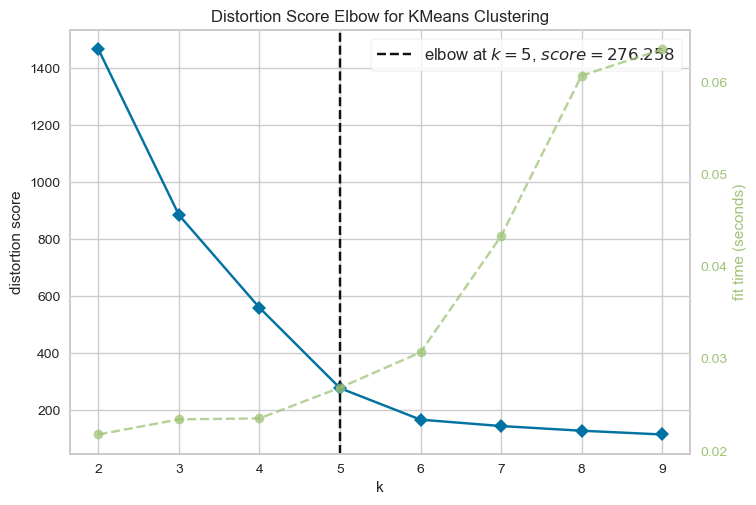

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_rfe)
visualizer.show()

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels_baru = kmeans.fit_predict(X_rfe)

score = silhouette_score(X_rfe, kmeans_labels_baru)

print(f"Silhouette Score:  {score:.3f}")

Silhouette Score:  0.726


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [40]:
df_raw_w_cluster = df.copy()
df_raw_w_cluster['Cluster'] =kmeans_labels_baru

In [41]:
df_raw_w_cluster.head()

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster
0,58138.0,68,0,1617,25,0,True,False,True,False,False,0
1,46344.0,71,2,27,6,0,True,False,True,False,False,0
2,71613.0,60,0,776,21,0,False,True,True,False,False,1
3,26646.0,41,1,53,8,0,False,True,True,False,False,1
4,58293.0,44,1,422,19,0,False,True,False,True,False,2


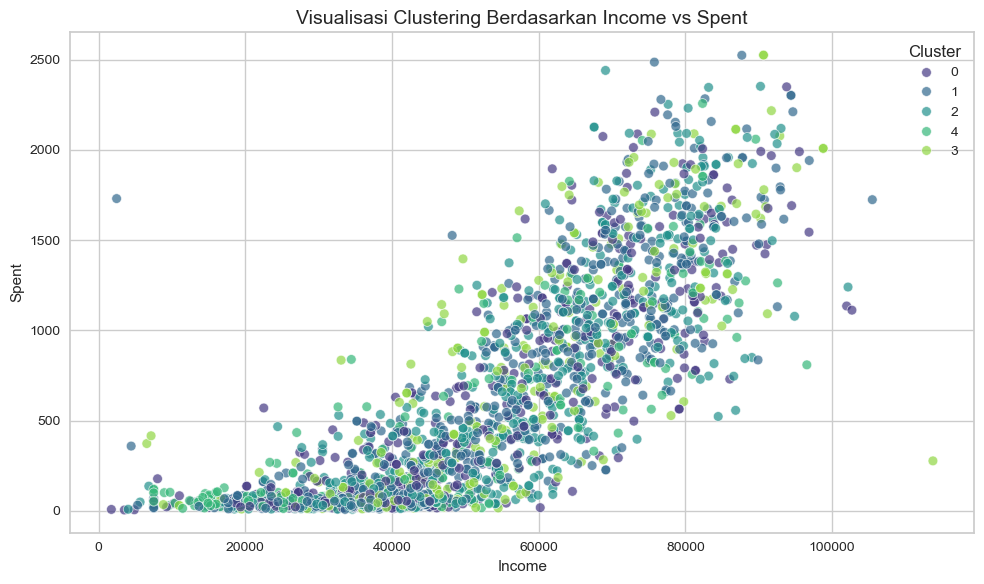

In [42]:
x_feature = 'Income'
y_feature = 'Spent'


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_raw_w_cluster[x_feature],
    y=df_raw_w_cluster[y_feature],
    hue=df_raw_w_cluster['Cluster'].astype(str),
    palette='viridis',
    alpha=0.7
)
plt.title(f'Visualisasi Clustering Berdasarkan {x_feature} vs {y_feature}', fontsize=14)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [43]:
df_normalized['Cluster'] = kmeans_labels_baru
df_normalized.head()

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster
0,0.503625,0.696429,0.000000,0.639683,0.581395,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.398325,0.750000,0.666667,0.008730,0.139535,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.623933,0.553571,0.000000,0.305952,0.488372,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0.222456,0.214286,0.333333,0.019048,0.186047,0.0,0.0,1.0,1.0,0.0,0.0,1
4,0.505009,0.267857,0.333333,0.165476,0.441860,0.0,0.0,1.0,0.0,1.0,0.0,2


In [44]:
#Mengembalikan fitur yg sudah diencoding
ohe_columns = ["Living_With_Alone", "Living_With_Partner", 
               "Education_Graduate", "Education_Postgraduate", "Education_Undergraduate"]

# Mengembalikan ke satu kolom baru
def reverse_one_hot(df, columns, new_col_name):
    df[new_col_name] = df[columns].idxmax(axis=1)  # ambil nama kolom dengan nilai 1
    df[new_col_name] = df[new_col_name].apply(lambda x: x.split('_', 1)[-1])  # ambil bagian setelah "_"
    return df

# Balikkan OHE Living_With dan Education
df_encoded = reverse_one_hot(df_normalized, ["Living_With_Alone", "Living_With_Partner"], "Living_With")
df_encoded = reverse_one_hot(df_encoded, ["Education_Graduate", "Education_Postgraduate", "Education_Undergraduate"], "Education")

# Cek hasil
df_encoded[["Living_With", "Education"]].head()


,Living_With,Education
0,With_Alone,Graduate
1,With_Alone,Graduate
2,With_Partner,Graduate
3,With_Partner,Graduate
4,With_Partner,Postgraduate


In [45]:
df_encoded.head()

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Living_With_Alone,Living_With_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster,Living_With,Education
0,0.503625,0.696429,0.000000,0.639683,0.581395,0.0,1.0,0.0,1.0,0.0,0.0,0,With_Alone,Graduate
1,0.398325,0.750000,0.666667,0.008730,0.139535,0.0,1.0,0.0,1.0,0.0,0.0,0,With_Alone,Graduate
2,0.623933,0.553571,0.000000,0.305952,0.488372,0.0,0.0,1.0,1.0,0.0,0.0,1,With_Partner,Graduate
3,0.222456,0.214286,0.333333,0.019048,0.186047,0.0,0.0,1.0,1.0,0.0,0.0,1,With_Partner,Graduate
4,0.505009,0.267857,0.333333,0.165476,0.441860,0.0,0.0,1.0,0.0,1.0,0.0,2,With_Partner,Postgraduate


In [46]:
#Hapus kolom yang tidak dibutuhkan
# Daftar kolom yang mau dihapus
columns_to_drop = ["Living_With_Alone", "Living_With_Partner", 
                   "Education_Graduate", "Education_Postgraduate", "Education_Undergraduate"]

# Hapus kolom
df_encoded = df_encoded.drop(columns=columns_to_drop)

# Cek hasil
df_encoded.head()

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Cluster,Living_With,Education
0,0.503625,0.696429,0.000000,0.639683,0.581395,0.0,0,With_Alone,Graduate
1,0.398325,0.750000,0.666667,0.008730,0.139535,0.0,0,With_Alone,Graduate
2,0.623933,0.553571,0.000000,0.305952,0.488372,0.0,1,With_Partner,Graduate
3,0.222456,0.214286,0.333333,0.019048,0.186047,0.0,1,With_Partner,Graduate
4,0.505009,0.267857,0.333333,0.165476,0.441860,0.0,2,With_Partner,Postgraduate


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [47]:
scaler = MinMaxScaler()

numerical_features = ["Income", "Age", "Kids", "Spent", "NumTotalPurchases", "TotalAcceptedCmp"]

scaler.fit(df[numerical_features])

df_encoded[numerical_features] = scaler.inverse_transform(df_encoded[numerical_features])

df_encoded.head()

,Income,Age,Kids,Spent,NumTotalPurchases,TotalAcceptedCmp,Cluster,Living_With,Education
0,58138.0,68.0,0.0,1617.0,25.0,0.0,0,With_Alone,Graduate
1,46344.0,71.0,2.0,27.0,6.0,0.0,0,With_Alone,Graduate
2,71613.0,60.0,0.0,776.0,21.0,0.0,1,With_Partner,Graduate
3,26646.0,41.0,1.0,53.0,8.0,0.0,1,With_Partner,Graduate
4,58293.0,44.0,1.0,422.0,19.0,0.0,2,With_Partner,Postgraduate


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [48]:
# Tentukan fitur numerik dan kategorikal
numerical_features = ["Income", "Age", "Kids", "Spent", "NumTotalPurchases", "TotalAcceptedCmp"]
categorical_features = ["Living_With", "Education"]

# Buat dictionary agregasi
agg_dict = {}

for col in numerical_features:
    agg_dict[col] = ['min', 'max', 'mean']

for col in categorical_features:
    agg_dict[col] = pd.Series.mode

# Lakukan agregasi berdasarkan Cluster
agg_result = df_encoded.groupby('Cluster').agg(agg_dict)

# Merapihkan MultiIndex kolom
agg_result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in agg_result.columns]

# Tampilkan hasil
print(agg_result)


         Income_min  Income_max   Income_mean  Age_min  Age_max   Age_mean  \
Cluster                                                                      
0            1730.0    102692.0  52362.930175     30.0     80.0  55.177057   
1            2447.0    105471.0  51770.598315     31.0     81.0  55.497191   
2            4023.0    102160.0  54327.759259     33.0     84.0  58.464815   
3            6560.0    113734.0  53683.913333     33.0     85.0  58.586667   
4            7500.0     96547.0  41771.246032     29.0     78.0  51.206349   

         Kids_min  Kids_max  Kids_mean  Spent_min  Spent_max  Spent_mean  \
Cluster                                                                    
0             0.0       3.0   0.870324        5.0     2349.0  622.930175   
1             0.0       3.0   0.970506        8.0     2524.0  621.080056   
2             0.0       3.0   1.018519        8.0     2440.0  634.179630   
3             0.0       3.0   0.960000       10.0     2525.0  667.550000 


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (dalam dolar):** 52362 
- **Rata-rata Spending (dalam dolar):** 622
- **Rata-rata Beli Barang :** 14
- **Modus dari Komposisi Rumah Tangga :** Hidup sendiri
- **Modus dari Strata Pendidikan :** Tinggi (Diploma/Sarjana)
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tinggi dan pengeluaran cukup besar, mereka hidup sendiri dan berpendidikan tinggi.

## Cluster 2:
- **Rata-rata Annual Income (dalam dolar):** 51770  
- **Rata-rata Spending (dalam dolar):** 621
- **Rata-rata Beli Barang :** 15
- **Modus dari Komposisi Rumah Tangga :** Hidup Bersama Orang Lain 
- **Modus dari Strata Pendidikan :** Tinggi (Diploma/Sarjana)
- **Analisis:** Cluster ini memiliki pendapatan tinggi dan pengeluaran yang cukup besar, mereka hidup bersama dan berpendidikan tinggi.

## Cluster 3:
- **Rata-rata Annual Income (dalam dolar):** 54327  
- **Rata-rata Spending (dalam dolar):** 634
- **Rata-rata Beli Barang :** 15
- **Modus dari Komposisi Rumah Tangga :** Hidup Bersama Orang Lain 
- **Modus dari Strata Pendidikan :** Sangat Tinggi (Master/PhD)
- **Analisis:** Cluster ini terdiri dari pelangan dengan pendapatan paling tinggi dan pengeluaran besar, mereka hidup bersama, dan berpendidikan sangat tinggi.

## Cluster 4:
- **Rata-rata Annual Income (dalam dolar):** 53683  
- **Rata-rata Spending (dalam dolar):** 667
- **Rata-rata Beli Barang :** 15
- **Modus dari Komposisi Rumah Tangga :** Hidup Sendiri 
- **Modus dari Strata Pendidikan :** Sangat Tinggi (Master/PhD)
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tinggi dengan pengeluaran paling besar, mereka hidup sendiri dan berpendidikan sangat tinggi.

## Cluster 5:
- **Rata-rata Annual Income (dalam dolar):** 41771  
- **Rata-rata Spending (dalam dolar):** 409
- **Rata-rata Beli Barang :** 12
- **Modus dari Komposisi Rumah Tangga :** Hidup Bersama Orang Lain 
- **Modus dari Strata Pendidikan :** Pendidikan Rendah
- **Analisis:** Cluster ini terdiri dari pelanggan berendapatan terendah, pengeluaran paling kecil diantara klaster pelanggan yang lain, berpendidikan rendah, pembelian barang paling sedikit dan hidup bersama.   

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [50]:
# Simpan df_encoded ke file CSV
df_encoded.to_csv('Dataset_inisiasi.csv', index=False)

print("Dataframe df_encoded berhasil disimpan sebagai 'Dataset_inisiasi.csv'")

Dataframe df_encoded berhasil disimpan sebagai 'Dataset_inisiasi.csv'
